In [1]:
'''
Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on 
experience in applying these techniques to a real-world dataset.

Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and 
    DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.
'''

'\nObjective:\nThe objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on \nexperience in applying these techniques to a real-world dataset.\n\nData Preprocessing:\n1.\tPreprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.\n2.\tPerform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.\n3.\tUse multiple visualizations to understand the hidden patterns in the dataset\nImplementing Clustering Algorithms:\n•\tImplement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.\n•\tApply each clustering algorithm to the pre-processed dataset to identify clusters within the data.\n•\tExperiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K 

In [2]:
'''
Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
'''

'\nData Preprocessing:\n1.\tPreprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.\n2.\tPerform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.\n3.\tUse multiple visualizations to understand the hidden patterns in the dataset\n'

In [3]:
#Load the dataset
import pandas as pd
df = pd.read_csv("C:\\Users\\sujey\\Downloads\\Assignments\\Clustering\\Clustering\\EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
#checking for null values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
#split the variables
X = df[["Balance","Bonus_miles"]]

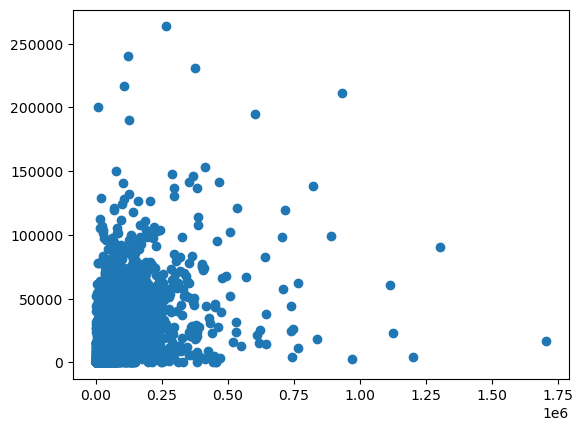

In [8]:
#Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
#plotting scatterplot before scaling
import matplotlib.pyplot as plt
plt.scatter(df["Balance"],df["Bonus_miles"])
plt.show()

In [9]:
#Data Transformation
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(X)
SS_X.head()

,Balance,Bonus_miles
0,-0.451141,-0.702786
1,-0.539457,-0.701088
2,-0.320031,-0.539253
3,-0.583799,-0.689286
4,0.239678,1.083121


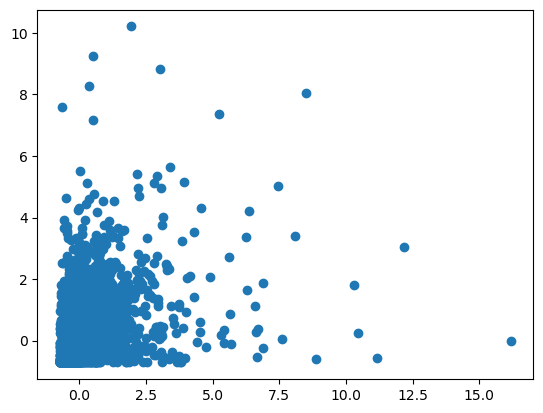

In [10]:
#plotting scatterplot after scaling
import matplotlib.pyplot as plt
plt.scatter(SS_X["Balance"],SS_X["Bonus_miles"])
plt.show()

In [11]:
'''
Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and 
    DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.
'''

'\nImplementing Clustering Algorithms:\n•\tImplement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.\n•\tApply each clustering algorithm to the pre-processed dataset to identify clusters within the data.\n•\tExperiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and \n    DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.\n'

In [12]:
#Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
no_of_clusters = 2
cluster1 = AgglomerativeClustering(n_clusters = no_of_clusters,linkage = "single")
df["single"] = cluster1.fit_predict(SS_X)

cluster1 = AgglomerativeClustering(n_clusters = no_of_clusters,linkage = "complete")
df["complete"] = cluster1.fit_predict(SS_X)

cluster1 = AgglomerativeClustering(n_clusters = no_of_clusters,linkage = "average")
df["average"] = cluster1.fit_predict(SS_X)

cluster1 = AgglomerativeClustering(n_clusters = no_of_clusters,linkage = "ward")
df["ward"] = cluster1.fit_predict(SS_X)

df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,single,complete,average,ward
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1,0,1


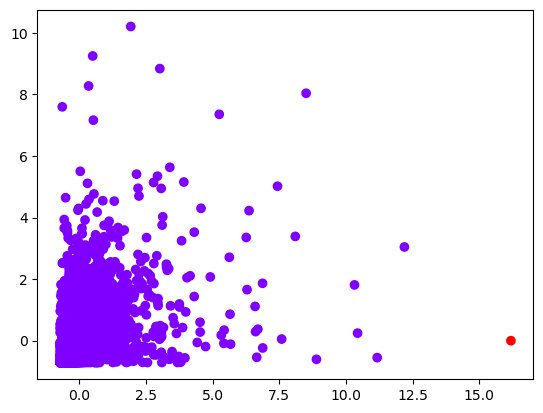

In [13]:
#single linkage --> scatterplot --> accepted
import matplotlib.pyplot as plt
plt.scatter(SS_X["Balance"],SS_X["Bonus_miles"],c=df["single"],cmap="rainbow")
plt.show()

In [14]:
#silhouette score for single linkage
from sklearn.metrics import silhouette_score
s_score = silhouette_score(SS_X,df["single"])
print("Silhouette score for single linkage: ",round(s_score,3))

Silhouette score for single linkage:  0.911


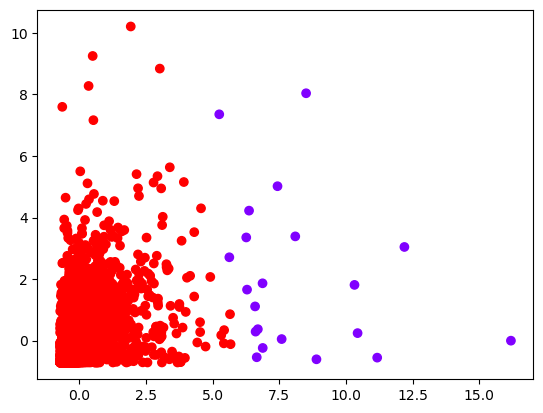

In [15]:
#complete linkage --> scatterplot --> rejected
import matplotlib.pyplot as plt
plt.scatter(SS_X["Balance"],SS_X["Bonus_miles"],c=df["complete"],cmap="rainbow")
plt.show()

In [16]:
#silhouette score for complete linkage
from sklearn.metrics import silhouette_score
s_score = silhouette_score(SS_X,df["complete"])
print("Silhouette score for complete linkage: ",round(s_score,3))

Silhouette score for complete linkage:  0.842


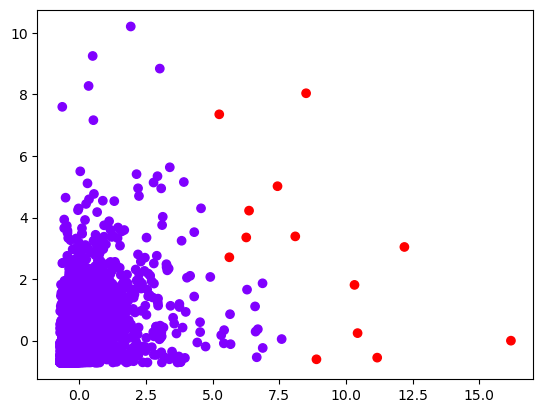

In [17]:
#average linkage --> scatterplot --> rejected
import matplotlib.pyplot as plt
plt.scatter(SS_X["Balance"],SS_X["Bonus_miles"],c=df["average"],cmap="rainbow")
plt.show()

In [18]:
#silhouette score for average linkage
from sklearn.metrics import silhouette_score
s_score = silhouette_score(SS_X,df["average"])
print("Silhouette score for average linkage: ",round(s_score,3))

Silhouette score for average linkage:  0.858


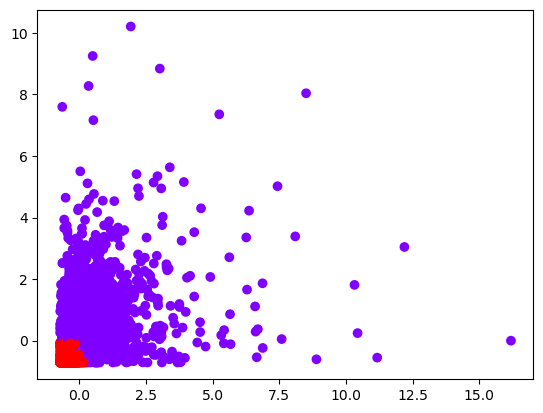

In [19]:
#ward linkage --> scatterplot --> rejected
import matplotlib.pyplot as plt
plt.scatter(SS_X["Balance"],SS_X["Bonus_miles"],c=df["ward"],cmap="rainbow")
plt.show()

In [20]:
#silhouette score for ward linkage
from sklearn.metrics import silhouette_score
s_score = silhouette_score(SS_X,df["ward"])
print("Silhouette score for ward linkage: ",round(s_score,3))

Silhouette score for ward linkage:  0.435


In [21]:
#K-Means Clustering
from sklearn.cluster import KMeans
scores = []
for i in range(2,11):
    cluster = KMeans(n_clusters = i)
    df["K"] = cluster.fit_predict(SS_X)
    scores.append(round(silhouette_score(SS_X,df["K"]),3))
scores

[0.626, 0.59, 0.507, 0.495, 0.489, 0.533, 0.525, 0.475, 0.478]

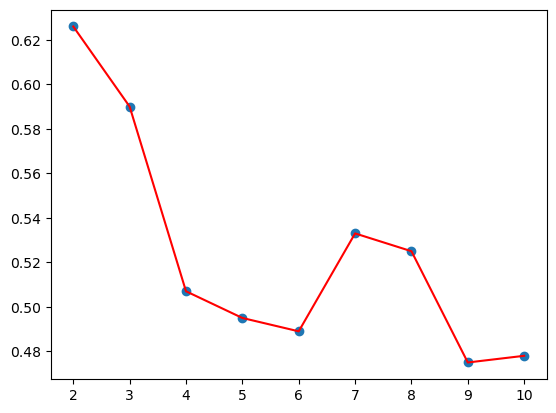

In [22]:
#scatterplot for the K values
import matplotlib.pyplot as plt
plt.scatter(range(2,11),scores)
plt.plot(range(2,11),scores,color="red")
plt.show()

In [23]:
print("The best silhouette score using KMeans clustering:",max(scores))

The best silhouette score using KMeans clustering: 0.626


In [24]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
cluster1 = DBSCAN(eps=1,min_samples=3)
df["dbscan"] = cluster1.fit_predict(SS_X)

In [25]:
#silhouette score for DBSCAN
from sklearn.metrics import silhouette_score
s_score = silhouette_score(SS_X,df["dbscan"])
print("Silhouette score for DBSCAN: ",round(s_score,3))

Silhouette score for DBSCAN:  0.86


In [ ]:
#Interpretation
#So, we get the highest silhouette score for single linkage clustering with n=2, the score = 0.911
#For KMeans we get highest score for k=2                                       , the score = 0.626
#For DBSCAN we get                                                               the score = 0.86